# Customer Segmentation

In [1]:
# Import Relevant Libraries

In [2]:
#!pip install deap

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import statistics
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn import metrics
from deap import algorithms
from deap import base
from deap import creator
from scipy.stats import zscore
from deap import tools
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import Birch
from numpy import unique

In [4]:
# Load the excel file
data = pd.read_excel('Online Retail.xlsx')
print(f'\nDimension of Data is: {data.shape}')


Dimension of Data is: (541909, 8)


In [5]:
print('\n Dimension of Data is:')
print(data.shape)


 Dimension of Data is:
(541909, 8)


## Data Preprocessing and Exploratory Data Analysis

In [6]:
# Display headers
print("First five rows of the dataset: ")
data.head()

First five rows of the dataset: 


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
# Display the structure of the dataset
print("\nStructure of the dataset: ")
data.info()


Structure of the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
# Descriptive statistics for numerical features
print("\nDescriptive statistics for numerical features")
data.describe().T


Descriptive statistics for numerical features


,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [9]:
# Data Cleaning

#Check for Missing Values
print('\n Missing data : ')
print(data.isnull().sum())


 Missing data : 
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [10]:
# Remove blank rows in Customer ID
data['CustomerID'].replace('', np.nan, inplace=True)
data.dropna(subset=['CustomerID'], inplace=True)
print('\n The new dimension of Data is: ')
print(data.shape)


 The new dimension of Data is: 
(406829, 8)


In [11]:
# Drop Duplicate Records
data.drop_duplicates()
print(data.shape)

(406829, 8)


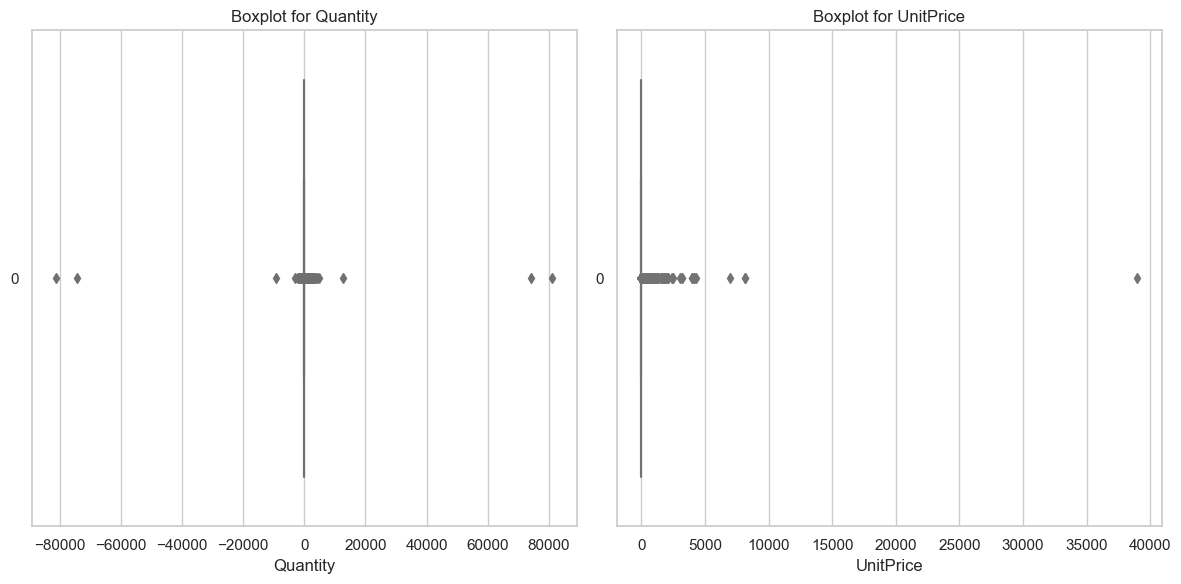

In [12]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Setting up the plot area
plt.figure(figsize=(12, 6))

# Creating a boxplot for 'Quantity'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.boxplot(data['Quantity'], orient='h', color='skyblue')
plt.title('Boxplot for Quantity')
plt.xlabel('Quantity')

# Creating a boxplot for 'UnitPrice'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(data['UnitPrice'], orient='h', color='lightgreen')
plt.title('Boxplot for UnitPrice')
plt.xlabel('UnitPrice')

# Show the plot
plt.tight_layout()  # Adjusts plot parameters to give some padding and prevent overlap
plt.show()

In [13]:
# Remove negative quantities
data = data[data['Quantity'] > 0]

In [14]:
# Check data after removal of negative quantities
print(data.shape)

(397924, 8)


In [15]:
outlier_indices = data[(data['Quantity'] > 20000) | (data['UnitPrice'] > 5000)].index
# Remove outliers
data = data.drop(outlier_indices)
print("Number of outliers removed:", len(outlier_indices))
print("Data shape after outlier removal:", data.shape)

Number of outliers removed: 3
Data shape after outlier removal: (397921, 8)


In [16]:
# Adding the Total Price column and displaying the Clenaed top five records
data['TotalPrice']=data['Quantity']*data['UnitPrice']
print(data.head(5))

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  


In [17]:
df = data.groupby(['InvoiceNo'])['InvoiceNo'].count().reset_index(name='InvoiceCounts')
new_df = data.groupby(['InvoiceNo'])['TotalPrice'].sum().reset_index(name='InvoicePrice')
df=df.join(new_df['InvoicePrice'])
print(df.head(5))

   InvoiceNo  InvoiceCounts  InvoicePrice
0     536365              7        139.12
1     536366              2         22.20
2     536367             12        278.73
3     536368              4         70.05
4     536369              1         17.85


# Exploratory Data Analysis

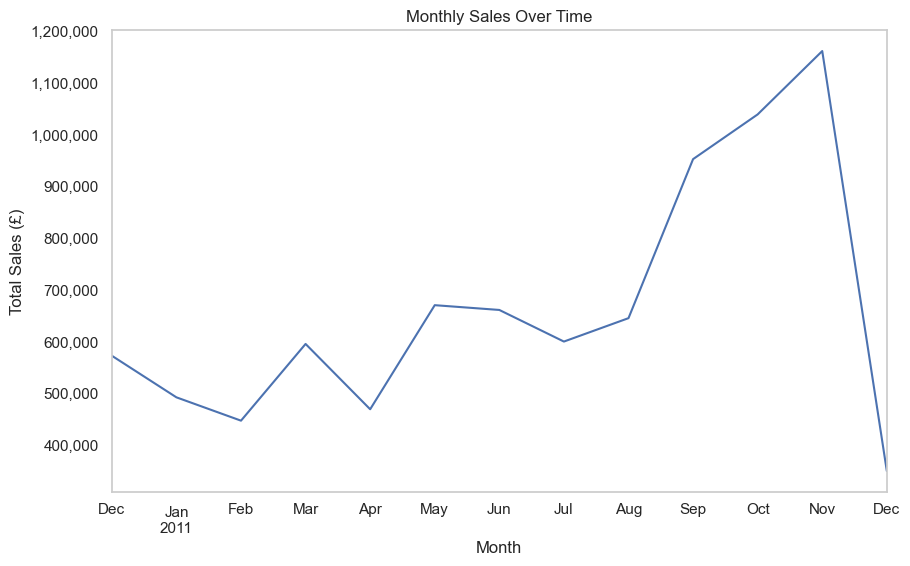

In [18]:
# Assuming 'data' is your DataFrame and 'Description' is the column with item names
data.set_index('InvoiceDate', inplace=True)
monthly_sales = data['TotalPrice'].resample('M').sum()

# Plotting monthly sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(title='Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales (£)')

# Adjusting y-axis to display in the format '400,000' to '1,200,000'
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)

# Removing grid lines
plt.grid(False)

plt.show()

In [19]:
# Displaying the monthly sales as a table
monthly_sales_table = pd.DataFrame(monthly_sales)
monthly_sales_table.columns = ['Total Sales']

# Display the table
monthly_sales_table

,Total Sales
InvoiceDate,
2010-12-31,572713.890
2011-01-31,492261.440
2011-02-28,447137.350
2011-03-31,595500.760
2011-04-30,469200.361
2011-05-31,670451.810
2011-06-30,661213.690
2011-07-31,600091.011
2011-08-31,645343.900


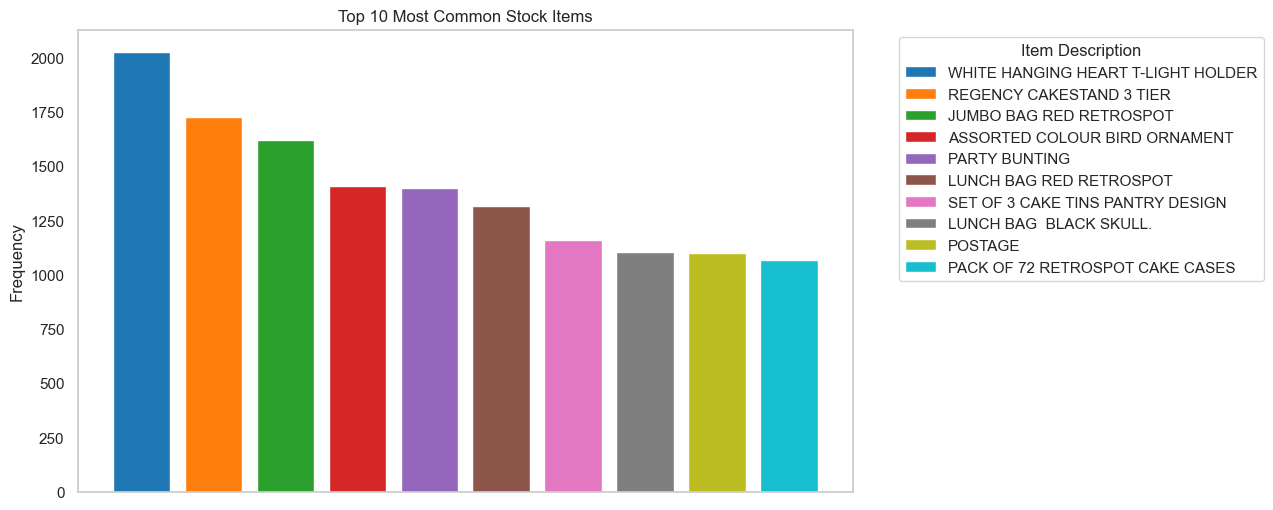

In [20]:
# Given that 'data' is the DataFrame and 'Description' is the column with item names
top_items = data['Description'].value_counts().head(10)

# Generate colors from a color map
color_map = plt.cm.get_cmap('tab10')  
colors = color_map(range(len(top_items)))

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_items.index, top_items.values, color=colors)

# Create a legend
plt.legend(bars, top_items.index, title="Item Description", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Top 10 Most Common Stock Items')
plt.ylabel('Frequency')
plt.xticks([])  # Hide x-tick labels
plt.grid(False)  # Disable grid lines
plt.show()

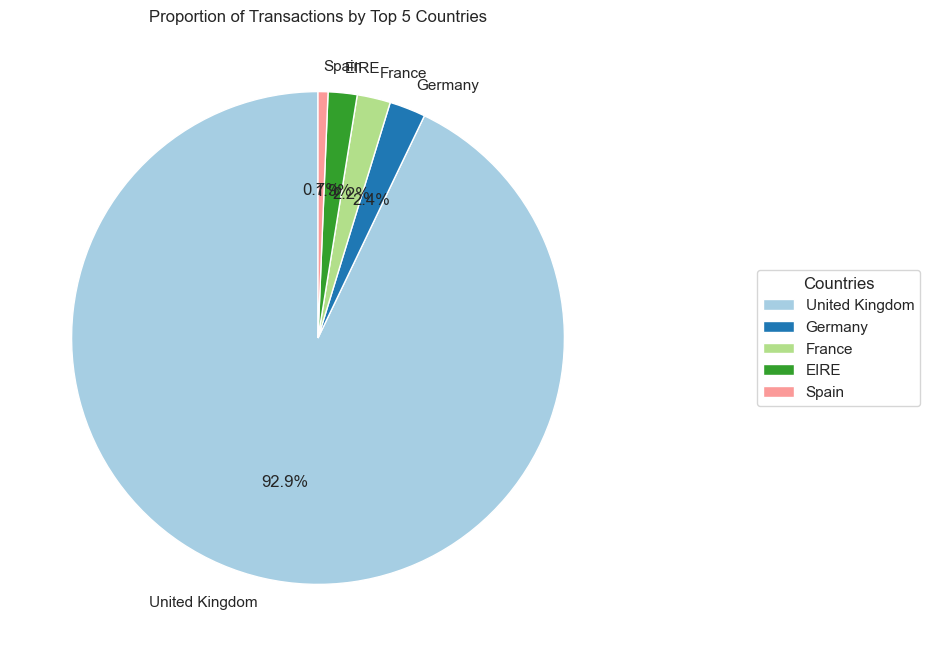

In [21]:
# Counting transactions per country
transactions_per_country = data['Country'].value_counts()

# Sort and limit to the top 5 countries
top_countries = transactions_per_country.head(5)

# Create the pie chart
plt.figure(figsize=(8, 8))
pie_wedges = plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired(range(len(top_countries))))
plt.title('Proportion of Transactions by Top 5 Countries')
plt.legend(pie_wedges[0], top_countries.index, title="Countries", loc="center left", bbox_to_anchor=(1.2, 0.5))
plt.ylabel('')  # Hiding the y-label as it's not needed for pie charts
plt.show()

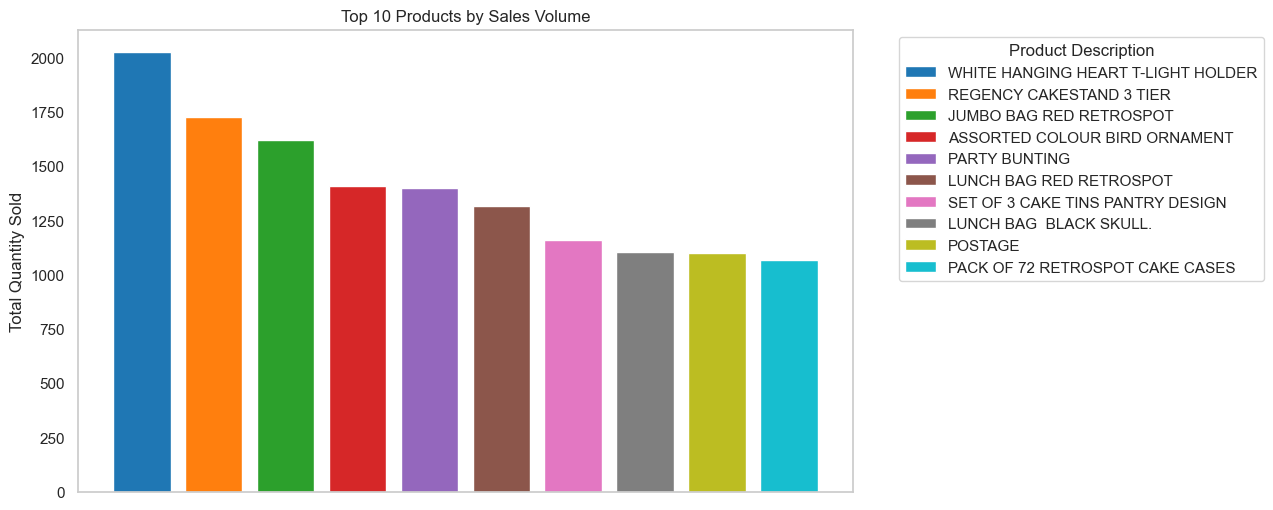

In [22]:
top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
# Generate colors from a color map
color_map = plt.cm.get_cmap('tab10')  
colors = color_map(range(len(top_items)))

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_items.index, top_items.values, color=colors)

# Create a legend
plt.legend(bars, top_items.index, title="Product Description", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Top 10 Products by Sales Volume')
plt.ylabel('Total Quantity Sold')
plt.xticks([])  # Hide x-tick labels
plt.grid(False)  # Disable grid lines
plt.show()

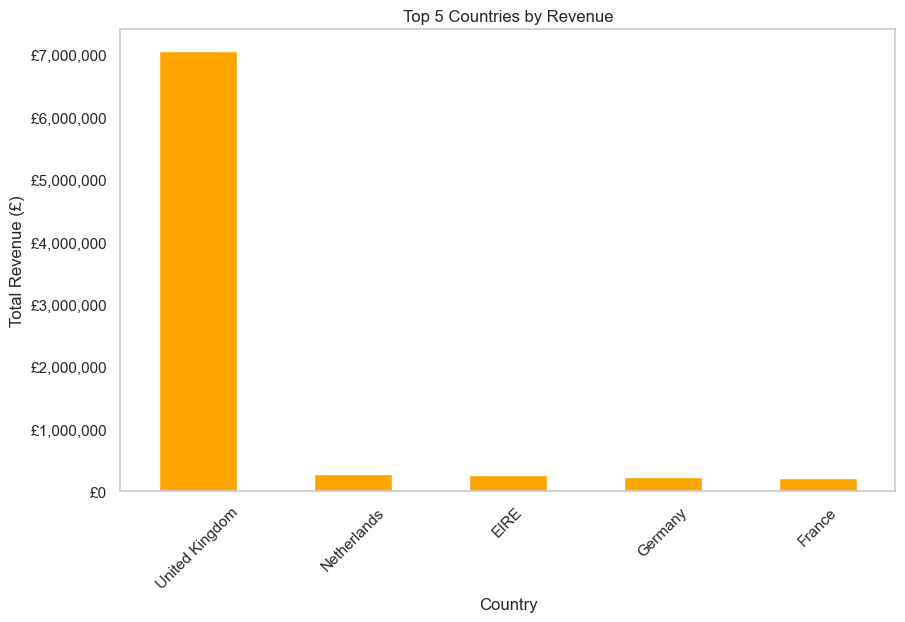

In [32]:
# Grouping data by country and calculating total revenue, then taking the top 5
revenue_by_country = data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(5)

# Plotting the total revenue as a bar chart
plt.figure(figsize=(10, 6))
revenue_by_country.plot(kind='bar', title='Top 5 Countries by Revenue', color='Orange')
plt.xlabel('Country')
plt.ylabel('Total Revenue (£)')  # Add currency symbol if needed

# Adjusting y-axis to display in the format '100,000' to '700,000'
fmt = '£{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)

# Removing grid lines
plt.grid(False)

plt.xticks(rotation=45)
plt.show()

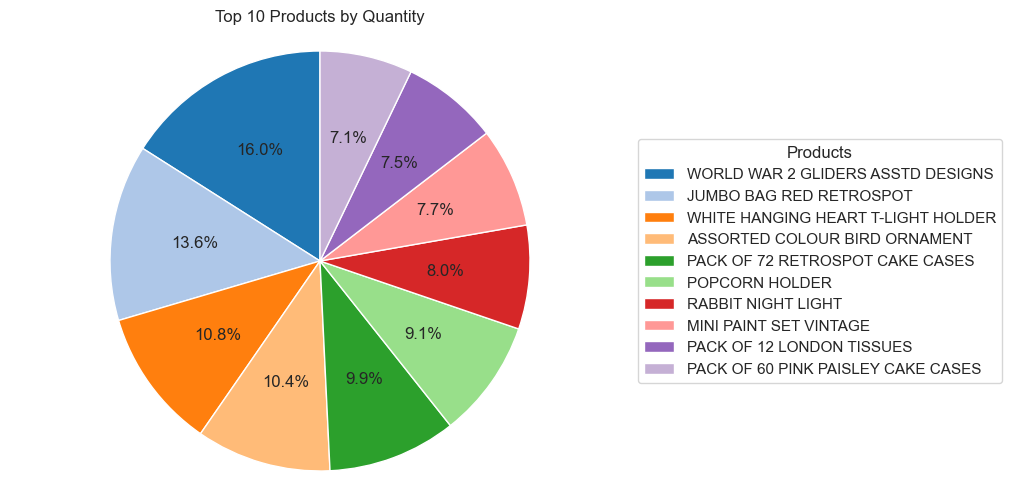

In [40]:
# Assuming 'data' is your DataFrame
# Grouping data and getting the top 10 products by quantity
Products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(8, 6))
colors = plt.cm.tab20(range(10))  # Color map for distinct colors
wedges, texts, autotexts = ax.pie(Products, autopct='%1.1f%%', startangle=90, colors=colors)

# Adding a legend with a title and positioning it beside the pie chart
ax.legend(wedges, Products.index, title="Products", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('Top 10 Products by Quantity')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


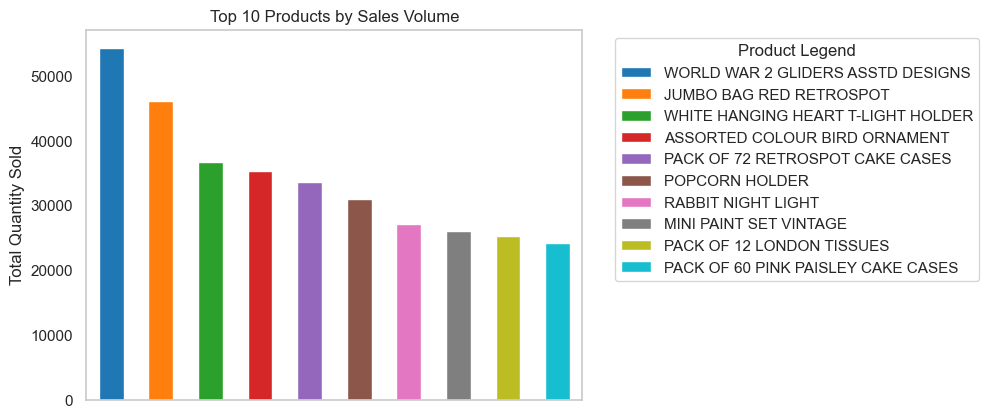

In [44]:
# Assuming 'data' is your DataFrame and has already been imported
top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
# Generate colors from a color map
color_map = plt.cm.get_cmap('tab10')  
colors = color_map(range(len(top_products)))

# Plotting
fig, ax = plt.subplots()
top_products.plot(kind='bar', title='Top 10 Products by Sales Volume', color=colors, ax=ax)
ax.set_xlabel('')  # Removes the x-axis label
ax.set_ylabel('Total Quantity Sold')

# Create a custom legend with product names
bars = ax.patches
labels = [description for description in top_products.index]
legend = ax.legend(bars, labels, title="Product Legend", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks([])  # Hide x-tick labels
plt.grid(False)  # Disable grid lines
plt.show()

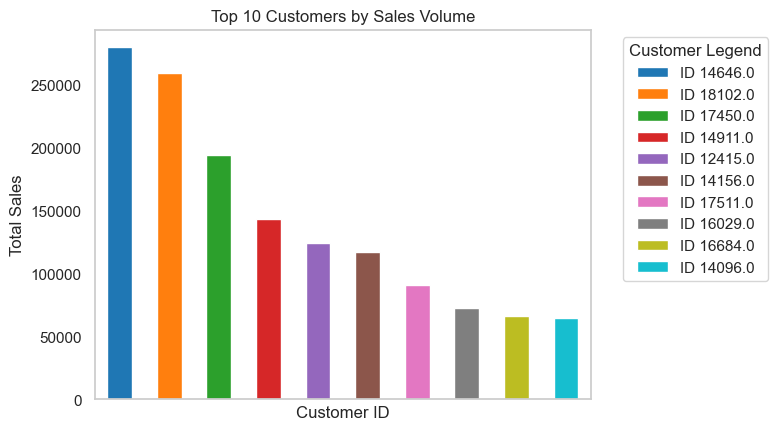

In [47]:
# Assuming 'data' is your DataFrame and has already been imported
top_customers = data.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

color_map = plt.cm.get_cmap('tab10')  
colors = color_map(range(len(top_products)))
# Plotting
fig, ax = plt.subplots()
top_customers.plot(kind='bar', color=colors, ax=ax)
ax.set_title('Top 10 Customers by Sales Volume')
ax.set_xlabel('Customer ID')
ax.set_ylabel('Total Sales')
ax.set_xticklabels(top_customers.index, rotation=45)

# Create a custom legend with customer IDs
bars = ax.patches
labels = [f'ID {cid}' for cid in top_customers.index]
legend = ax.legend(bars, labels, title="Customer Legend", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks([])  # Hide x-tick labels
plt.grid(False)  # Disable grid lines
plt.show()

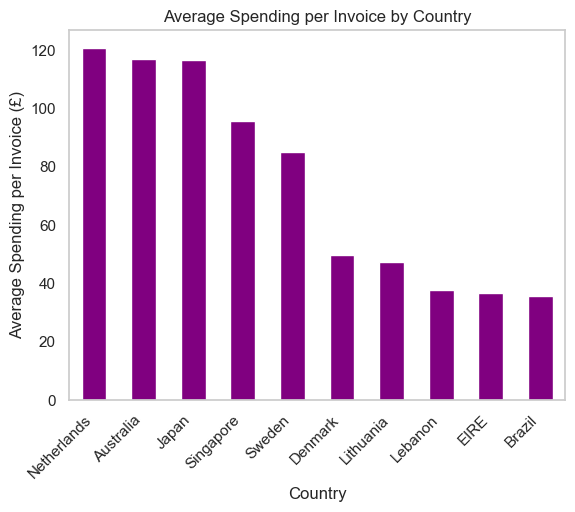

In [52]:
# Assuming 'data' is your DataFrame and has already been imported
average_spending = data.groupby('Country')['TotalPrice'].mean().sort_values(ascending=False).head(10)

# Plotting
fig, ax = plt.subplots()
average_spending.plot(kind='bar', title='Average Spending per Invoice by Country', color='purple', ax=ax)
ax.set_xlabel('Country')
ax.set_ylabel('Average Spending per Invoice (£)')
ax.set_xticks(range(len(average_spending)))  # Set x-ticks to match the bar positions
ax.set_xticklabels(average_spending.index, rotation=45, ha="right")  # ha is horizontal alignment
plt.grid(False)  # Disable grid lines

plt.show()

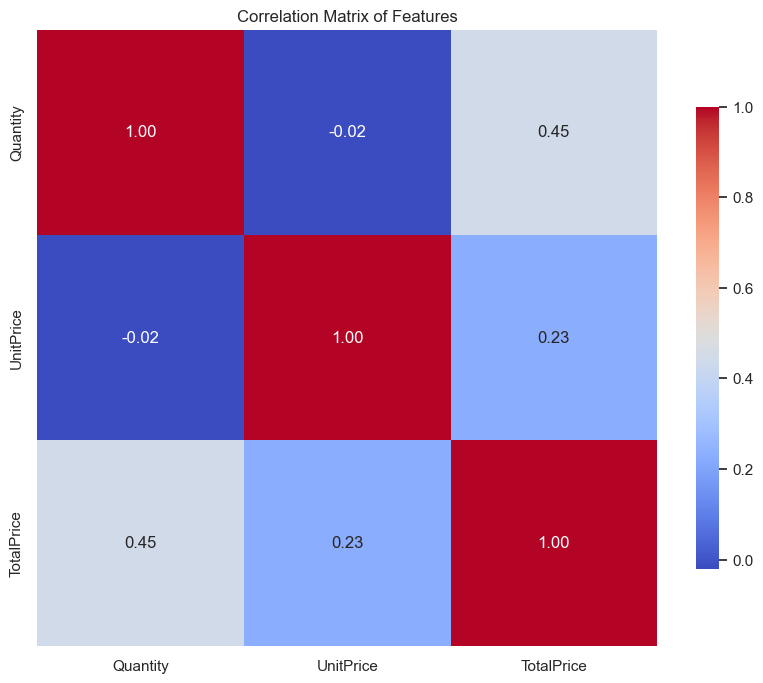

In [54]:
# Assuming 'data' is your DataFrame and has already been imported
# Dropping the 'CustomerID' column
data_filtered = data.drop('CustomerID', axis=1)

# Calculating the correlation matrix
correlation_matrix = data_filtered.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .75})  # Adjusted color bar size
plt.title('Correlation Matrix of Features')
plt.show()

In [55]:
if data.index.name == 'InvoiceDate':
    data.reset_index(inplace=True)

## RFM Analysis

In [56]:
#RFM Analysis

#Calculate Recency
data_recency = data.groupby(by= 'CustomerID', as_index=False)['InvoiceDate'].max()
data_recency.columns = ['CustomerID', 'LastInvoiceDate']
recent_date = data_recency['LastInvoiceDate'].max()
data_recency['Recency'] = data_recency['LastInvoiceDate'].apply(
    lambda x: (recent_date - x).days)
print(data_recency.head(10))

   CustomerID     LastInvoiceDate  Recency
0     12347.0 2011-12-07 15:52:00        1
1     12348.0 2011-09-25 13:13:00       74
2     12349.0 2011-11-21 09:51:00       18
3     12350.0 2011-02-02 16:01:00      309
4     12352.0 2011-11-03 14:37:00       35
5     12353.0 2011-05-19 17:47:00      203
6     12354.0 2011-04-21 13:11:00      231
7     12355.0 2011-05-09 13:49:00      213
8     12356.0 2011-11-17 08:40:00       22
9     12357.0 2011-11-06 16:07:00       32


In [57]:
# Calculating Frequency
frequency_data = data.drop_duplicates().groupby(
    by=['CustomerID'], as_index=False)['InvoiceDate'].count()
frequency_data.columns = ['CustomerID', 'Frequency']
frequency_data.head(5)

,CustomerID,Frequency
0,12347.0,182
1,12348.0,31
2,12349.0,73
3,12350.0,17
4,12352.0,85


In [58]:
# Calculating Monetary Value

data['Total'] = data['UnitPrice']*data['Quantity']
monetary_data = data.groupby(by='CustomerID', as_index=False)['Total'].sum()
monetary_data.columns = ['CustomerID', 'Monetary']
monetary_data.head(5)

,CustomerID,Monetary
0,12347.0,4310.00
1,12348.0,1797.24
2,12349.0,1757.55
3,12350.0,334.40
4,12352.0,2506.04


In [59]:
# Merging RFM

rf_data = data_recency.merge(frequency_data, on='CustomerID')
rfm_data = rf_data.merge(monetary_data, on='CustomerID').drop(
    columns='LastInvoiceDate')
rfm_data.head(5)

,CustomerID,Recency,Frequency,Monetary
0,12347.0,1,182,4310.00
1,12348.0,74,31,1797.24
2,12349.0,18,73,1757.55
3,12350.0,309,17,334.40
4,12352.0,35,85,2506.04


In [60]:
# Ranking Customer's based upon their RFM score

rfm_data['R_rank'] = rfm_data['Recency'].rank(ascending=False)
rfm_data['F_rank'] = rfm_data['Frequency'].rank(ascending=True)
rfm_data['M_rank'] = rfm_data['Monetary'].rank(ascending=True)

In [61]:
# Normalizing the rank of the customers

rfm_data['R_rank_norm'] = (rfm_data['R_rank']/rfm_data['R_rank'].max())*100
rfm_data['F_rank_norm'] = (rfm_data['F_rank']/rfm_data['F_rank'].max())*100
rfm_data['M_rank_norm'] = (rfm_data['M_rank']/rfm_data['M_rank'].max())*100

In [62]:
# Check the rfm_data header
rfm_data.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm
0,12347.0,1,182,4310.00,4203.5,3827.5,4005.0,97.926616,88.231904,92.323651
1,12348.0,74,31,1797.24,1653.0,1837.0,3335.0,38.509027,42.346704,76.878746
2,12349.0,18,73,1757.55,3182.0,2910.5,3307.0,74.129295,67.093130,76.233287
3,12350.0,309,17,334.40,229.5,1082.0,1231.0,5.346535,24.942370,28.377132
4,12352.0,35,85,2506.04,2517.5,3083.0,3639.0,58.648806,71.069617,83.886584


In [63]:
# Drop R_rank, F_rank and M_rank column

rfm_data.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
rfm_data.head()

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,12347.0,1,182,4310.00,97.926616,88.231904,92.323651
1,12348.0,74,31,1797.24,38.509027,42.346704,76.878746
2,12349.0,18,73,1757.55,74.129295,67.093130,76.233287
3,12350.0,309,17,334.40,5.346535,24.942370,28.377132
4,12352.0,35,85,2506.04,58.648806,71.069617,83.886584


In [64]:
# Calculating RFM score

rfm_data['RFM_score'] = 0.15*rfm_data['R_rank_norm']+0.28 * \
    rfm_data['F_rank_norm']+0.57*rfm_data['M_rank_norm']
rfm_data['RFM_score'] *= 0.05
rfm_data = rfm_data.round(2)
rfm_data[['CustomerID', 'RFM_score']].head()

,CustomerID,RFM_score
0,12347.0,4.60
1,12348.0,3.07
2,12349.0,3.67
3,12350.0,1.20
4,12352.0,3.83


In [65]:
# Rating Customer based upon the RFM score

rfm_data["Customer_segment"] = np.where(rfm_data['RFM_score'] >
                                        4.5, "Top Customers",
                                        (np.where(
                                            rfm_data['RFM_score'] > 4,
                                            "High value Customers",
                                            (np.where(
    rfm_data['RFM_score'] > 3,
                              "Medium Value Customers",
                              np.where(rfm_data['RFM_score'] > 1.6,
                              'Low value Customers', 'Churned Customers'))))))
rfm_data['CustomerID'] = rfm_data['CustomerID'].astype(int)
rfm_data[['CustomerID', 'RFM_score', 'Customer_segment']].head(10)

,CustomerID,RFM_score,Customer_segment
0,12347,4.60,Top Customers
1,12348,3.07,Medium Value Customers
2,12349,3.67,Medium Value Customers
3,12350,1.20,Churned Customers
4,12352,3.83,Medium Value Customers
5,12353,0.27,Churned Customers
6,12354,2.78,Low value Customers
7,12355,1.48,Churned Customers
8,12356,3.83,Medium Value Customers
9,12357,4.32,High value Customers


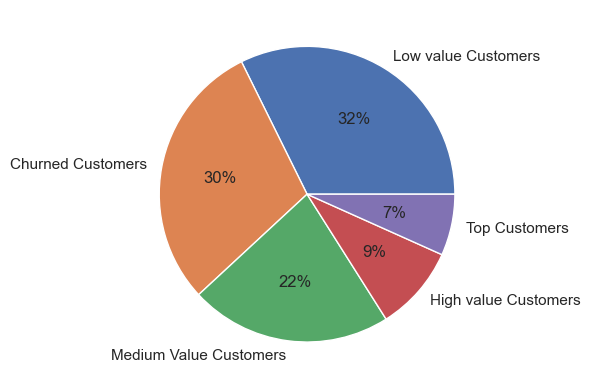

In [66]:
# Visualize the customer segments
plt.pie(rfm_data.Customer_segment.value_counts(),
       labels=rfm_data.Customer_segment.value_counts().index,
       autopct='%.0f%%')
plt.show()

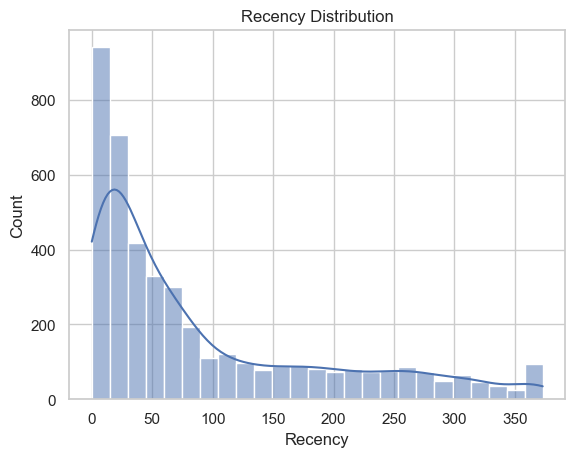

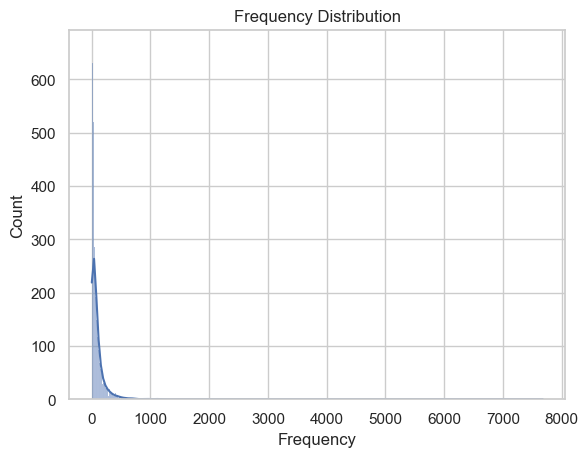

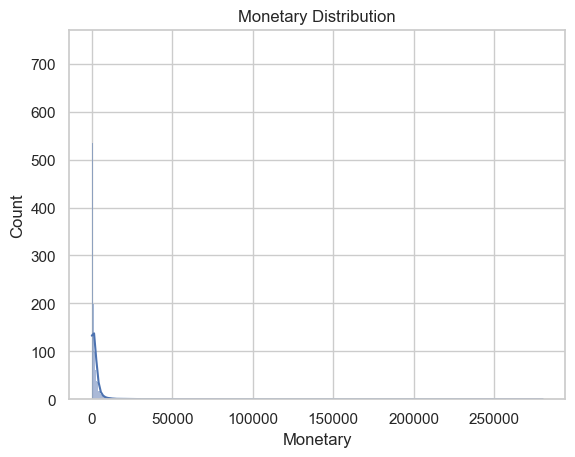

In [67]:
# Visualize RFM distributions
sns.histplot(rfm_data['Recency'], kde=True)
plt.title('Recency Distribution')
plt.show()

sns.histplot(rfm_data['Frequency'], kde=True)
plt.title('Frequency Distribution')
plt.show()

sns.histplot(rfm_data['Monetary'], kde=True)
plt.title('Monetary Distribution')
plt.show()

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data[['Recency', 'Frequency', 'Monetary']])


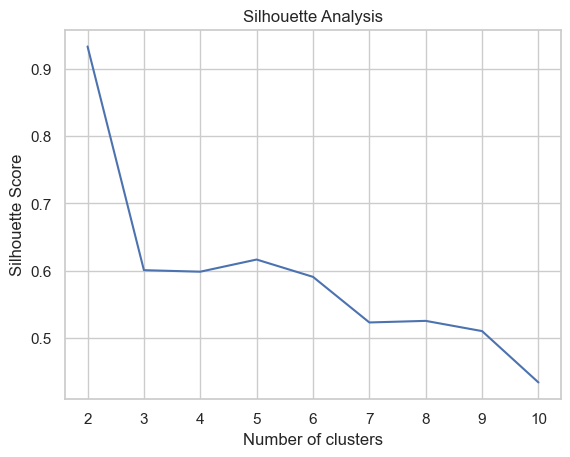

In [71]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(rfm_scaled)
    silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

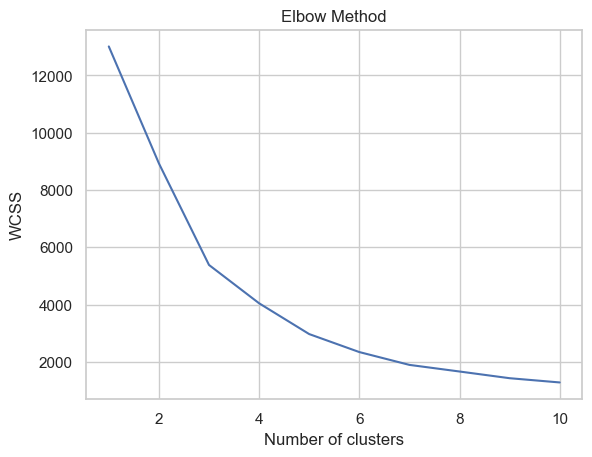

In [72]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# The "elbow" in this plot suggests that the optimal number of clusters is around 3 or 4.
# Choosing 4 clusters might capture additional subtleties in the data that are not captured with 3 clusters,particularly if there is evidence that the data naturally divides into 4 distinct groups.

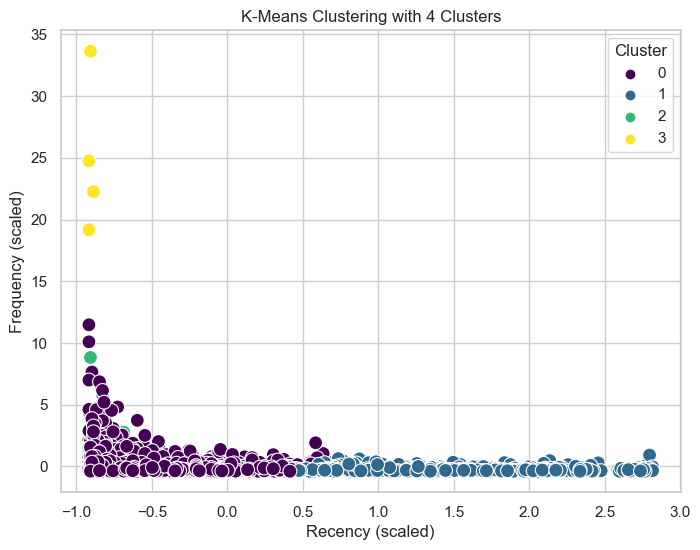

Cluster Centroids:
[[-5.12035689e-01  5.61791234e-02  1.08872766e-02]
 [ 1.54759606e+00 -2.79927233e-01 -1.67565123e-01]
 [-8.35517837e-01  3.99566785e+00  2.26574489e+01]
 [-9.05551388e-01  2.49542750e+01  8.07758157e+00]]


In [80]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Step 3: Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=rfm_scaled[:, 0], y=rfm_scaled[:, 1], hue=rfm_data['Cluster'], palette='viridis', s=100)
plt.title('K-Means Clustering with 4 Clusters')
plt.xlabel('Recency (scaled)')
plt.ylabel('Frequency (scaled)')
plt.show()

# Optional: Print cluster centroids
print("Cluster Centroids:")
print(kmeans.cluster_centers_)

In [84]:
kmeans_silhouette_avg = silhouette_score(rfm_scaled, rfm_data['Cluster'])
print(f"Silhouette Score for Kmeans: {kmeans_silhouette_avg:.4f}")

Silhouette Score for Kmeans: 0.5983


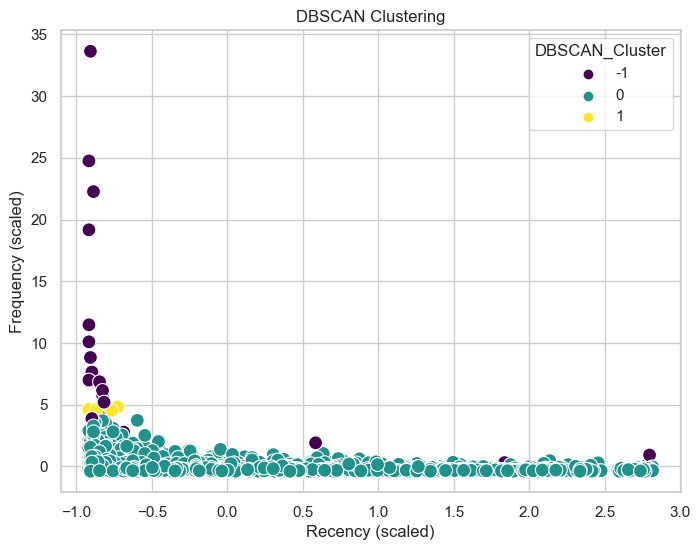

In [85]:
# Step 1: Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
rfm_data['DBSCAN_Cluster'] = dbscan.fit_predict(rfm_scaled)


# Step 3: Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=rfm_scaled[:, 0], y=rfm_scaled[:, 1], hue=rfm_data['DBSCAN_Cluster'], palette='viridis', s=100)
plt.title('DBSCAN Clustering')
plt.xlabel('Recency (scaled)')
plt.ylabel('Frequency (scaled)')
plt.show()

In [86]:
# Step 2: Calculate and print the Silhouette Score
dbscan_silhouette_avg = silhouette_score(rfm_scaled, rfm_data['DBSCAN_Cluster'])
print(f"Silhouette Score for DBSCAN: {dbscan_silhouette_avg:.4f}")

Silhouette Score for DBSCAN: 0.7100


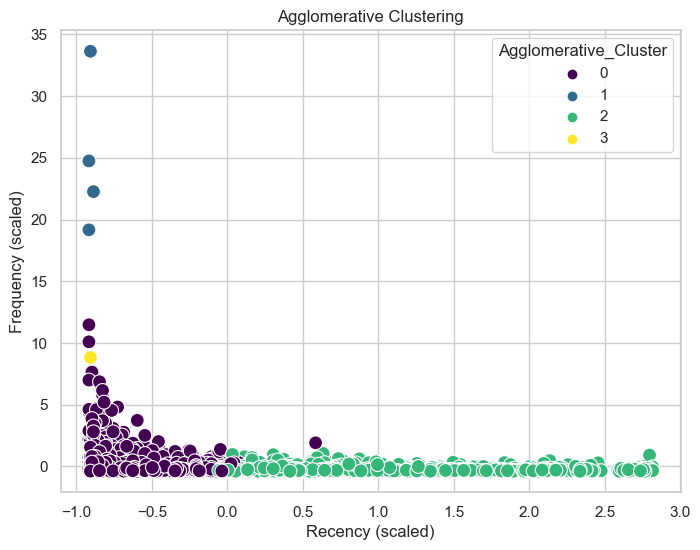

In [87]:
# Step 1: Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
rfm_data['Agglomerative_Cluster'] = agg_clustering.fit_predict(rfm_scaled)

# Step 3: Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=rfm_scaled[:, 0], y=rfm_scaled[:, 1], hue=rfm_data['Agglomerative_Cluster'], palette='viridis', s=100)
plt.title('Agglomerative Clustering')
plt.xlabel('Recency (scaled)')
plt.ylabel('Frequency (scaled)')
plt.show()

In [88]:
# Step 2: Calculate and print the Silhouette Score
agg_silhouette_avg = silhouette_score(rfm_scaled, rfm_data['Agglomerative_Cluster'])
print(f"Silhouette Score for Agglomerative Clustering: {agg_silhouette_avg:.4f}")

Silhouette Score for Agglomerative Clustering: 0.5286


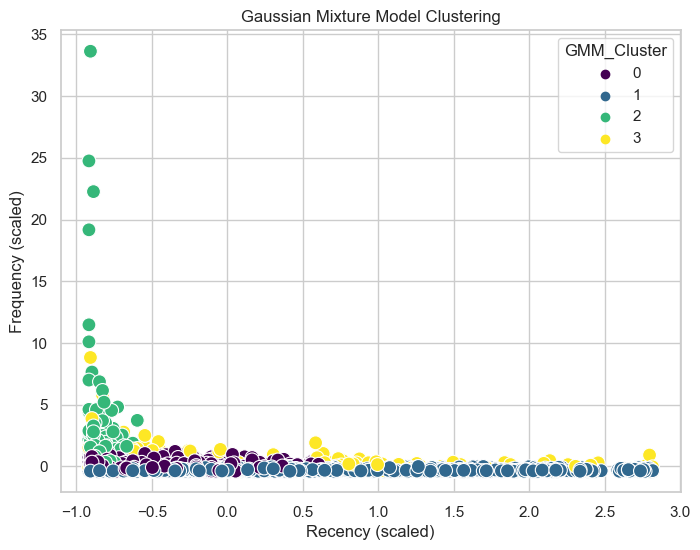

In [89]:
# Step 1: Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
rfm_data['GMM_Cluster'] = gmm.fit_predict(rfm_scaled)

# Step 3: Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=rfm_scaled[:, 0], y=rfm_scaled[:, 1], hue=rfm_data['GMM_Cluster'], palette='viridis', s=100)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Recency (scaled)')
plt.ylabel('Frequency (scaled)')
plt.show()

In [90]:
# Step 2: Calculate and print the Silhouette Score
gmm_silhouette_avg = silhouette_score(rfm_scaled, rfm_data['GMM_Cluster'])
print(f"Silhouette Score for Gaussian Mixture Model: {gmm_silhouette_avg:.4f}")

Silhouette Score for Gaussian Mixture Model: 0.1325


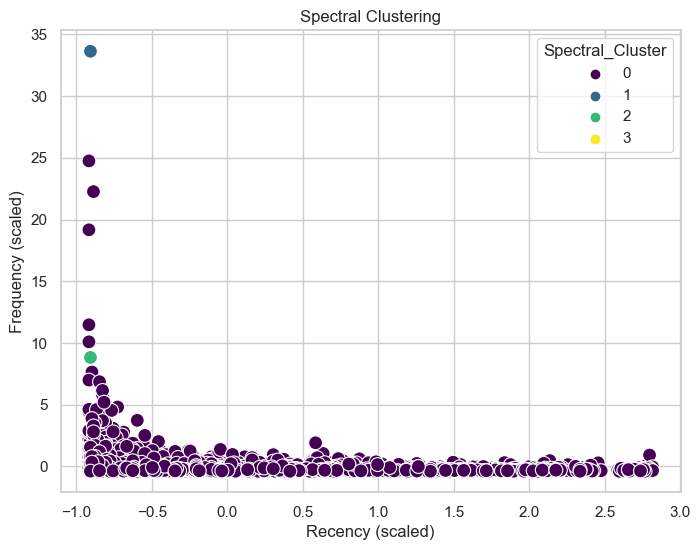

In [91]:
# Step 1: Apply Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=4, affinity='rbf', random_state=42)
rfm_data['Spectral_Cluster'] = spectral_clustering.fit_predict(rfm_scaled)


# Step 3: Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=rfm_scaled[:, 0], y=rfm_scaled[:, 1], hue=rfm_data['Spectral_Cluster'], palette='viridis', s=100)
plt.title('Spectral Clustering')
plt.xlabel('Recency (scaled)')
plt.ylabel('Frequency (scaled)')
plt.show()

In [92]:
# Step 2: Calculate and print the Silhouette Score
spectral_silhouette_avg = silhouette_score(rfm_scaled, rfm_data['Spectral_Cluster'])
print(f"Silhouette Score for Spectral Clustering: {spectral_silhouette_avg:.4f}")

Silhouette Score for Spectral Clustering: 0.9355


In [93]:
# Create a dictionary to store all silhouette scores
silhouette_scores = {
    "K-Means": kmeans_silhouette_avg,
    "DBSCAN": dbscan_silhouette_avg,
    "Agglomerative Clustering": agg_silhouette_avg,
    "Gaussian Mixture Model": gmm_silhouette_avg,
    "Spectral Clustering": spectral_silhouette_avg
}

# Print all silhouette scores for comparison
print("\nComparison of Silhouette Scores:")
for method, score in silhouette_scores.items():
    print(f"{method}: {score:.4f}")


Comparison of Silhouette Scores:
K-Means: 0.5983
DBSCAN: 0.7100
Agglomerative Clustering: 0.5286
Gaussian Mixture Model: 0.1325
Spectral Clustering: 0.9355
